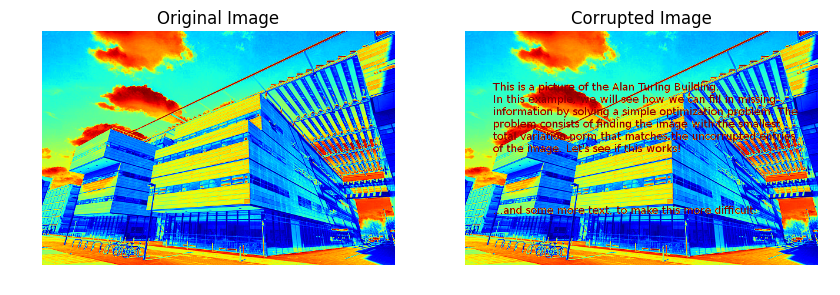

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the images.
orig_img = Image.open("alanturing.png")
orig_img = orig_img.convert('L')
corr_img = Image.open("alanturing-blabla.png")
corr_img = corr_img.convert('L')

# Convert to arrays.
Uorig = np.array(orig_img)
Ucorr = np.array(corr_img)
rows, cols = Uorig.shape

# Known is 1 if the pixel is known,
# 0 if the pixel was corrupted.
Known = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
         if Uorig[i, j] == Ucorr[i, j]:
            Known[i, j] = 1

%matplotlib inline
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].imshow(orig_img);
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(corr_img);
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

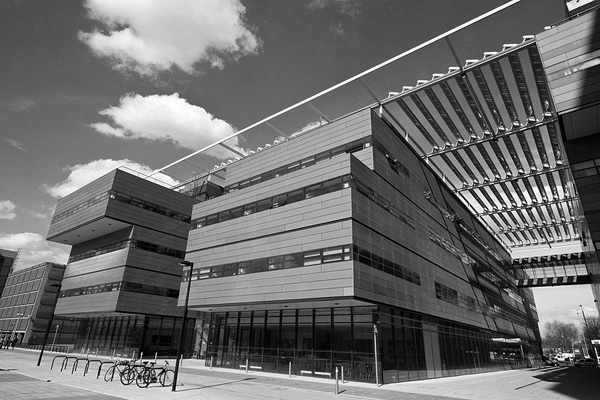

In [23]:
orig_img

In [24]:
import cvxpy as cvx

In [25]:
U = cvx.Variable(rows, cols)
obj = cvx.Minimize(cvx.tv(U))
constraints = [cvx.mul_elemwise(Known, U) == cvx.mul_elemwise(Known, Ucorr)]
prob = cvx.Problem(obj, constraints)

prob.solve(verbose=True, solver=cvx.SCS)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 1417549, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 479001, constraints m = 957003
Cones:	primal zero / dual free vars: 240000
	soc vars: 717003, soc blks: 239001
Setup time: 1.79e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.32e+00  4.92e+00  1.00e+00 -1.26e+08  8.33e+06  0.00e+00  1.15e+00 
   100| 2.90e-03  9.75e-04  1.40e-03  4.55e+06  4.56e+06  3.72e-09  1.93e+01 
   200| 1.02e-03  2.64e-04  3.47e-04  4.58e+06  4.58e+06  3.79e-09  3.81e+

4576651.715057738

(-0.5, 599.5, 399.5, -0.5)

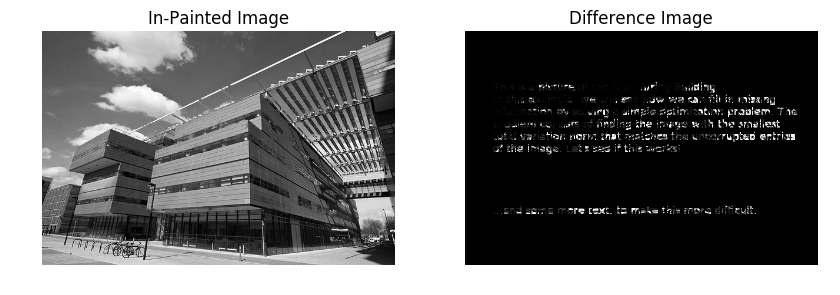

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
img_rec = Image.fromarray(U.value)
ax[0].imshow(img_rec);
ax[0].set_title("In-Painted Image")
ax[0].axis('off')

img_diff = Image.fromarray(10*np.abs(Uorig - U.value))
ax[1].imshow(img_diff);
ax[1].set_title("Difference Image")
ax[1].axis('off')

In [29]:
ax[0].imshow(img_rec)